In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score
from utils import load_data
from genetic_algorithm import fitness_a, fitness_b, fitness_c, fitness_d
from gentree import GenTree

<h1> GenTree </h1>

In [2]:
dataset = "iris"
depth = 4
vae_pop_size = (1000, 500, 32)
epochs = 50
fitness = fitness_a
omega = 0.75

In [3]:
# Load the data
X_train, X_val, X_test, y_train, y_val, y_test = load_data(dataset)

X = [X_train, X_val]
y = [y_train, y_val]

In [4]:
gt = GenTree(dataset)
gt.run(X=X, y=y, depth=depth, vae_pop_size=vae_pop_size, epochs=epochs, fitness=fitness, omega=omega)

Epoch: 32, Test set ELBO: -23.322359085083008, time elapse for current epoch: 0.0925760269165039
gen	nevals	min     	avg   
0  	100   	0.266667	0.6775
1  	62    	0.216667	0.489 
2  	72    	0.216667	0.400333
3  	52    	0.216667	0.334333
4  	68    	0.216667	0.3155  
5  	52    	0.216667	0.280167
6  	61    	0.216667	0.2765  
7  	56    	0.216667	0.249667
8  	54    	0.216667	0.244833
9  	60    	0.216667	0.232   
10 	64    	0.216667	0.233333
11 	60    	0.216667	0.2295  
12 	64    	0.216667	0.2315  
13 	68    	0.216667	0.230167
14 	75    	0.216667	0.233167
15 	60    	0.216667	0.226333
16 	62    	0.216667	0.224833
17 	72    	0.216667	0.2295  
18 	58    	0.216667	0.224333
19 	66    	0.216667	0.222667
20 	50    	0.216667	0.222   
21 	66    	0.216667	0.223333
22 	44    	0.216667	0.220667
23 	68    	0.216667	0.220833
24 	62    	0.216667	0.218667
25 	80    	0.216667	0.219667
26 	52    	0.216667	0.216667
27 	58    	0.216667	0.216667
28 	58    	0.216667	0.218167
29 	74    	0.216667	0.217667
30 	64    

<Figure size 640x480 with 0 Axes>

In [5]:
gt.hof

[[DecisionTreeClassifier(),
  5,
  3,
  2,
  1,
  0.9333333333333333,
  0.9321937321937322,
  0.21666666666666667],
 [DecisionTreeClassifier(),
  5,
  3,
  2,
  1,
  0.9333333333333333,
  0.9321937321937322,
  0.21666666666666667],
 [DecisionTreeClassifier(),
  5,
  3,
  2,
  1,
  0.9333333333333333,
  0.9321937321937322,
  0.21666666666666667],
 [DecisionTreeClassifier(),
  5,
  3,
  2,
  1,
  0.9333333333333333,
  0.9321937321937322,
  0.21666666666666667],
 [DecisionTreeClassifier(),
  5,
  3,
  2,
  1,
  0.9333333333333333,
  0.9321937321937322,
  0.21666666666666667],
 [DecisionTreeClassifier(),
  5,
  3,
  2,
  1,
  0.9333333333333333,
  0.9321937321937322,
  0.21666666666666667],
 [DecisionTreeClassifier(),
  5,
  3,
  2,
  1,
  0.9333333333333333,
  0.9321937321937322,
  0.21666666666666667],
 [DecisionTreeClassifier(),
  5,
  3,
  2,
  1,
  0.9333333333333333,
  0.9321937321937322,
  0.21666666666666667],
 [DecisionTreeClassifier(),
  5,
  3,
  2,
  1,
  0.9333333333333333,
  

<h2> Best DecisionTreeClassifier found </h2>

In [6]:
gt.best_dt

{'clf': DecisionTreeClassifier(),
 'n_nodes': 5,
 'n_leaves': 3,
 'max_depth': 2,
 'val_errors': 1,
 'val_accuracy': 0.9333333333333333,
 'val_f1': 0.9321937321937322,
 'val_fitness_value': 0.21666666666666667}

[Text(0.4, 0.8333333333333334, 'X[2] <= 0.34\ngini = 0.625\nsamples = 16\nvalue = [8, 4, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 0.542\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]')]

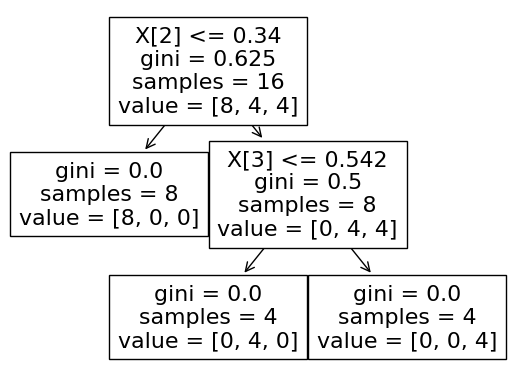

In [7]:
tree.plot_tree(gt.best_dt["clf"])

In [8]:
gt.best_dt["val_fitness_value"]

0.21666666666666667

In [9]:
# Tempo necessario a generare il dataset per allenare il VAE (in secondi)
gt.vae_pop_time

1.0035873340000023

In [10]:
# Tempo di esecuzione del VAE (in secondi)
gt.vae_time

5.078925333000001

In [11]:
# Tempo di esecuzione dell' algoritmo genetico (in secondi)
gt.gp_time

5.460896249999998

In [12]:
y_pred = gt.predict(X_test)

In [13]:
# Accuracy sul test set
accuracy_score(y_true=y_test, y_pred=y_pred)

1.0

In [14]:
# f1 score sul test set
f1_score(y_true=y_test, y_pred=y_pred, average='weighted')

1.0